In [6]:
#read in file

import pandas as pd

housing_data = pd.read_csv('housingCalifornia.csv')

Correlation Matrix of Numerical Features:
longitude - latitude: -0.92
longitude - housingMedianAge: -0.11
longitude - totalRooms: 0.04
longitude - totalBedrooms: 0.07
longitude - population: 0.10
longitude - households: 0.06
longitude - medianIncome: -0.02
longitude - medianHouseValue: -0.05
latitude - housingMedianAge: 0.01
latitude - totalRooms: -0.04
latitude - totalBedrooms: -0.07
latitude - population: -0.11
latitude - households: -0.07
latitude - medianIncome: -0.08
latitude - medianHouseValue: -0.14
housingMedianAge - totalRooms: -0.36
housingMedianAge - totalBedrooms: -0.32
housingMedianAge - population: -0.30
housingMedianAge - households: -0.30
housingMedianAge - medianIncome: -0.12
housingMedianAge - medianHouseValue: 0.11
totalRooms - totalBedrooms: 0.93
totalRooms - population: 0.86
totalRooms - households: 0.92
totalRooms - medianIncome: 0.20
totalRooms - medianHouseValue: 0.13
totalBedrooms - population: 0.88
totalBedrooms - households: 0.98
totalBedrooms - medianIncome:

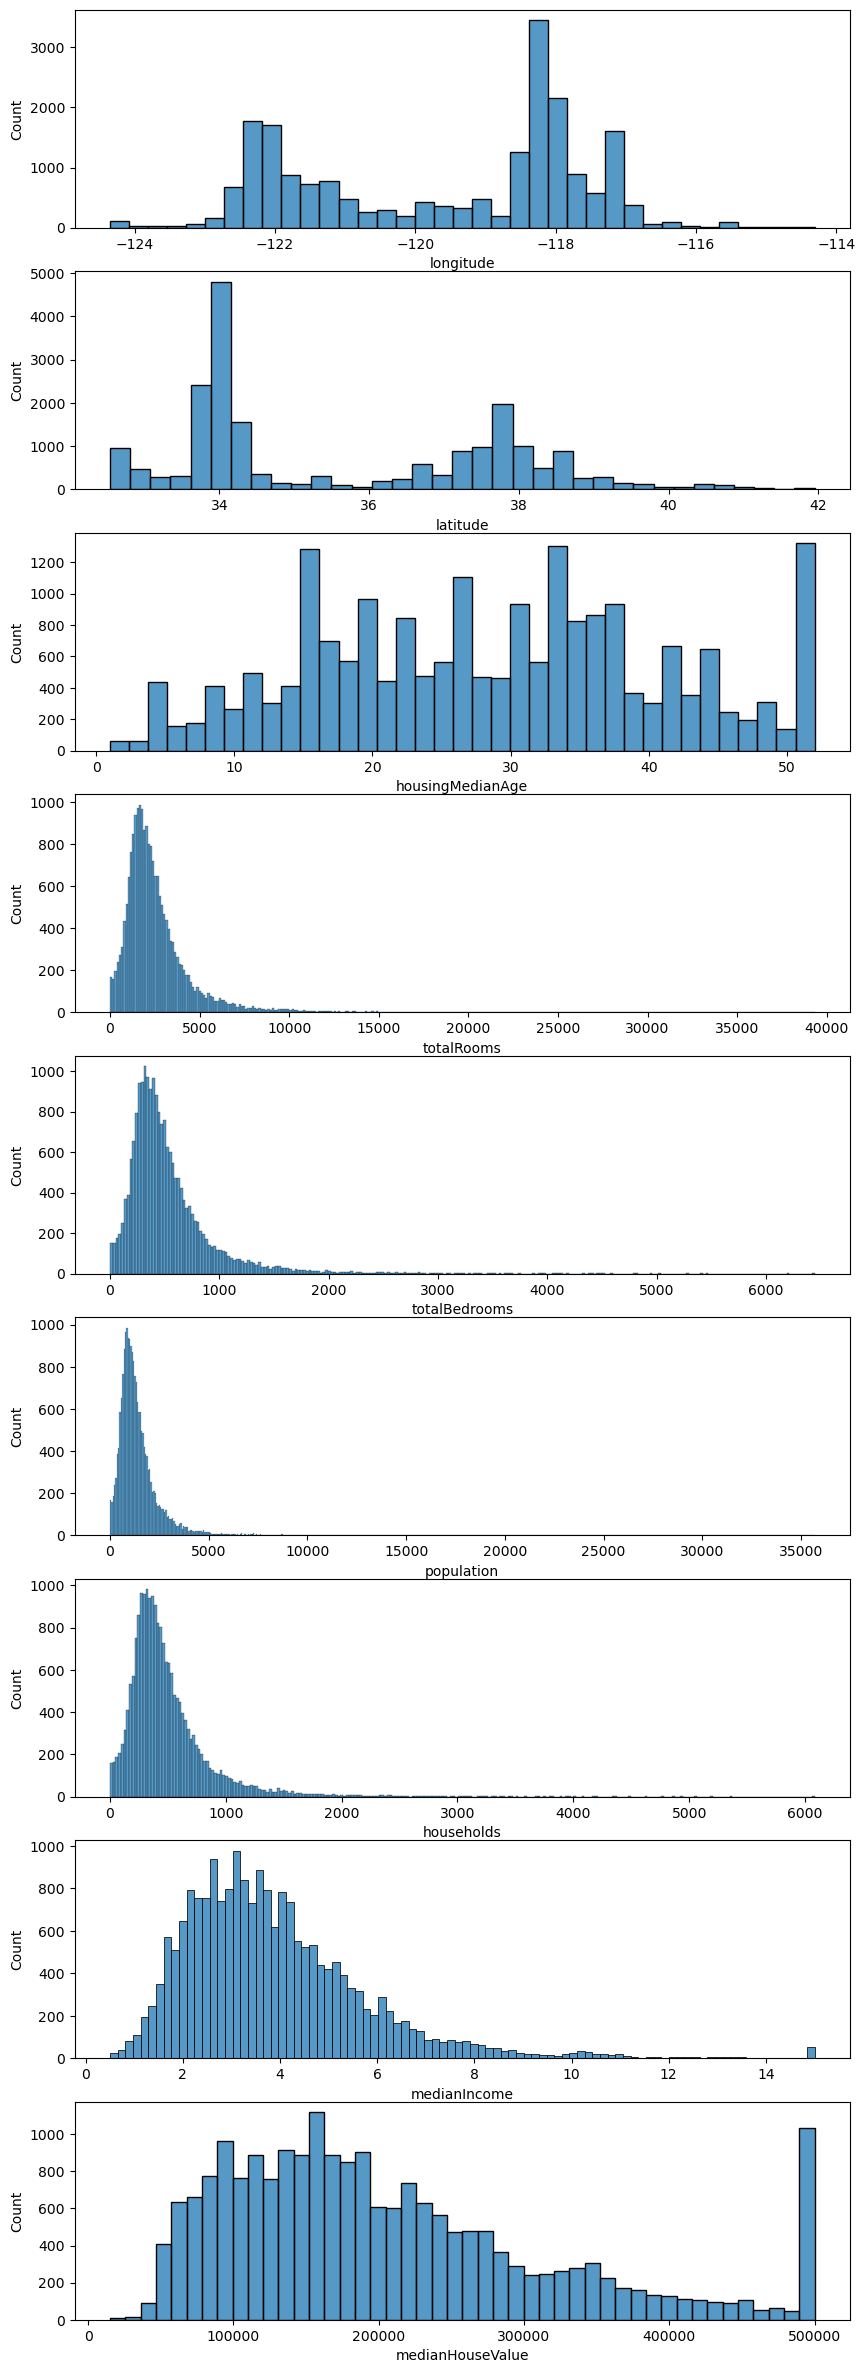

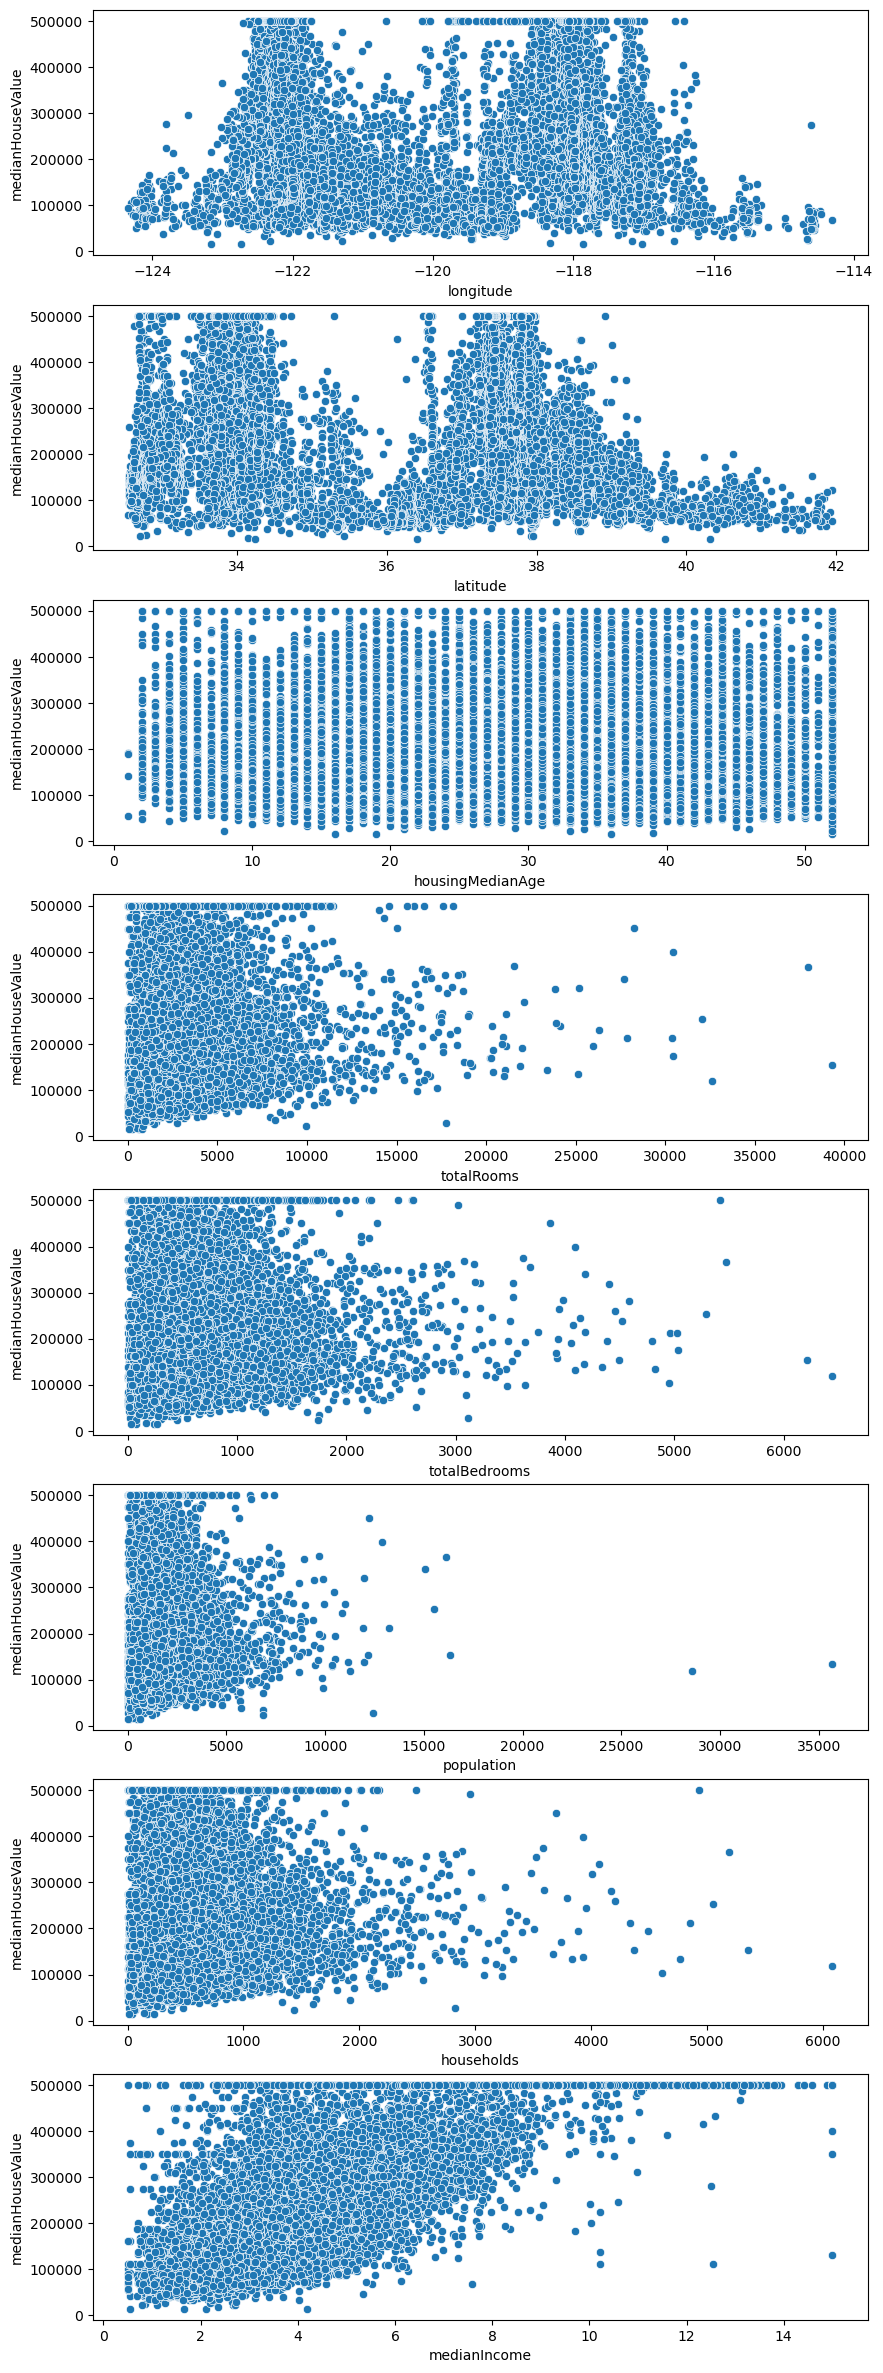

In [16]:
#D1

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that 'ocean_proximity' is the categorical variable in the dataset
numerical_data = housing_data.select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(nrows=numerical_data.shape[1], figsize=(10, 30))
for i, col in enumerate(numerical_data.columns):
    sns.histplot(data=numerical_data, x=col, ax=axs[i])

# (b) Compute the correlation matrix of all features (excluding the categorical variable)
correlation_matrix = numerical_data.corr()

print("Correlation Matrix of Numerical Features:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

# Describe which features are more correlated (correlation coefficient higher than 0.8 in magnitude)
highly_correlated = correlation_matrix[correlation_matrix > 0.8]

print("\nHighly Correlated Features:")
for i in range(len(highly_correlated.columns)):
    for j in range(i+1, len(highly_correlated.columns)):
        if highly_correlated.iloc[i, j] > 0.8:
            print(f"{highly_correlated.columns[i]} - {highly_correlated.columns[j]}: {highly_correlated.iloc[i, j]:.2f}")


# (c) Present a scatter plot for each variable, displaying the corresponding variable on the x-axis
# and the target variable on the y-axis.
# Assuming that 'median_house_value' is the target variable
target = 'medianHouseValue'

# Exclude the target variable when defining numerical_data
numerical_data = housing_data.drop(target, axis=1).select_dtypes(include=['float64', 'int64'])

# Now create the scatter plots
fig, axs = plt.subplots(nrows=numerical_data.shape[1], figsize=(10, 30))
for i, col in enumerate(numerical_data.columns):
    sns.scatterplot(data=housing_data, x=col, y=target, ax=axs[i])

In [5]:
import pandas as pd


dummies = pd.get_dummies(housing_data['oceanProximity'], drop_first=True)

data1 = pd.concat([housing_data, dummies], axis=1)

data1 = data1.drop('oceanProximity', axis=1)

data2 = data1.copy()

data2['medianHouseValue'] = data2['medianHouseValue'] / 100000

In [28]:
#D2 data processing

#split data sets into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train1, test1 = train_test_split(data1, test_size=0.2, random_state=5508)

train2, test2 = train_test_split(data2, test_size=0.2, random_state=5508)

#standardize the data

scaler1 = StandardScaler()
scaler2 = StandardScaler()

train1_scaled = scaler1.fit_transform(train1)
test1_scaled = scaler1.transform(test1)

train2_scaled = scaler2.fit_transform(train2)
test2_scaled = scaler2.transform(test2)

train1_scaled = pd.DataFrame(train1_scaled, columns=train1.columns)
test1_scaled = pd.DataFrame(test1_scaled, columns=test1.columns)

train2_scaled = pd.DataFrame(train2_scaled, columns=train2.columns)
test2_scaled = pd.DataFrame(test2_scaled, columns=test2.columns)



In [30]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso

# Original data
train1_target_orig = train1['medianHouseValue']
test1_target_orig = test1['medianHouseValue']
train1_regres_orig = train1.drop('medianHouseValue', axis=1)
test1_regres_orig = test1.drop('medianHouseValue', axis=1)

train2_target_orig = train2['medianHouseValue']
test2_target_orig = test2['medianHouseValue']
train2_regres_orig = train2.drop('medianHouseValue', axis=1)
test2_regres_orig = test2.drop('medianHouseValue', axis=1)

# Standardized data
train1_target_scaled = train1_scaled['medianHouseValue']
test1_target_scaled = test1_scaled['medianHouseValue']
train1_regres_scaled = train1_scaled.drop('medianHouseValue', axis=1)
test1_regres_scaled = test1_scaled.drop('medianHouseValue', axis=1)

train2_target_scaled = train2_scaled['medianHouseValue']
test2_target_scaled = test2_scaled['medianHouseValue']
train2_regres_scaled = train2_scaled.drop('medianHouseValue', axis=1)
test2_regres_scaled = test2_scaled.drop('medianHouseValue', axis=1)

# Fit and evaluate models on original and standardized data


# Linear Regression
linear_reg1 = LinearRegression()
linear_reg1.fit(train1_regres_orig, train1_target_orig)
linear_reg1_train_pred = linear_reg1.predict(train1_regres_orig)
linear_reg1_test_pred = linear_reg1.predict(test1_regres_orig)
linear_reg1_train_rmse = root_mean_squared_error(train1_target_orig, linear_reg1_train_pred)
linear_reg1_test_rmse = root_mean_squared_error(test1_target_orig, linear_reg1_test_pred)

linear_reg1_scaled = LinearRegression() 
linear_reg1_scaled.fit(train1_regres_scaled, train1_target_scaled)
linear_reg1_train_pred_scaled = linear_reg1_scaled.predict(train1_regres_scaled)
linear_reg1_test_pred_scaled = linear_reg1_scaled.predict(test1_regres_scaled)
linear_reg1_train_rmse_scaled = root_mean_squared_error(train1_target_scaled, linear_reg1_train_pred_scaled)
linear_reg1_test_rmse_scaled = root_mean_squared_error(test1_target_scaled, linear_reg1_test_pred_scaled)


# Print results
print(f'{data_name} - Linear Regression: Train RMSE = {linear_reg_train_rmse}, Test RMSE = {linear_reg_test_rmse}')
print(f'{data_name} - Lasso Regression: Train RMSE = {lasso_reg_train_rmse}, Test RMSE = {lasso_reg_test_rmse}')

Original data1 - Linear Regression: Train RMSE = 68607.3141310988, Test RMSE = 68589.31234032183
Original data1 - Lasso Regression: Train RMSE = 68660.50464281291, Test RMSE = 68601.80949979821
Standardized data1 - Linear Regression: Train RMSE = 0.5933334948871296, Test RMSE = 0.5931778108238343
Standardized data1 - Lasso Regression: Train RMSE = 1.0, Test RMSE = 0.9896907463251935
Original data2 - Linear Regression: Train RMSE = 0.686073141310988, Test RMSE = 0.6858931234032175
Original data2 - Lasso Regression: Train RMSE = 1.1293961641291712, Test RMSE = 1.1197610600292784
Standardized data2 - Linear Regression: Train RMSE = 0.5933334948871295, Test RMSE = 0.5931778108238341
Standardized data2 - Lasso Regression: Train RMSE = 1.0, Test RMSE = 0.9896907463251935
